In [1]:
from sklearn import linear_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
import scipy
import pymysql

In [2]:
df = pd.read_csv("EPL_Soccer_MLR_LR.csv").drop(columns = ["PlayerName", "Club"])

In [31]:
df2 = pd.read_csv("EPL_Soccer_MLR_LR.csv").drop(columns = ["PlayerName"])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DistanceCovered(InKms)  202 non-null    float64
 1   Goals                   202 non-null    float64
 2   MinutestoGoalRatio      202 non-null    float64
 3   ShotsPerGame            202 non-null    float64
 4   AgentCharges            202 non-null    int64  
 5   BMI                     202 non-null    float64
 6   Cost                    202 non-null    float64
 7   PreviousClubCost        202 non-null    float64
 8   Height                  202 non-null    float64
 9   Weight                  202 non-null    float64
 10  Score                   202 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 17.5 KB


In [4]:
df.describe()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4.718614,7.108663,43.091584,14.566337,76.876238,22.955891,69.021782,64.873713,180.103960,75.008168,13.507426
std,0.457976,1.800549,3.662989,1.362451,47.501239,2.863933,32.565333,13.070197,9.734494,13.925574,6.189826
min,3.800000,3.300000,35.900000,11.600000,8.000000,16.750000,28.000000,34.360000,148.900000,37.800000,5.630000
25%,4.372500,5.900000,40.600000,13.500000,41.250000,21.082500,43.850000,54.667500,174.000000,66.525000,8.545000
50%,4.755000,6.850000,43.500000,14.700000,65.500000,22.720000,58.600000,63.035000,179.700000,74.400000,11.650000
75%,5.030000,8.275000,45.575000,15.575000,97.000000,24.465000,90.350000,74.750000,186.175000,84.125000,18.080000
max,6.720000,14.300000,59.700000,19.200000,234.000000,34.420000,200.800000,106.000000,209.400000,123.200000,35.520000


In [5]:
corr = df.corr()

[Text(0.5, 0, 'DistanceCovered(InKms)'),
 Text(1.5, 0, 'Goals'),
 Text(2.5, 0, 'MinutestoGoalRatio'),
 Text(3.5, 0, 'ShotsPerGame'),
 Text(4.5, 0, 'AgentCharges'),
 Text(5.5, 0, 'BMI'),
 Text(6.5, 0, 'Cost'),
 Text(7.5, 0, 'PreviousClubCost'),
 Text(8.5, 0, 'Height'),
 Text(9.5, 0, 'Weight'),
 Text(10.5, 0, 'Score')]

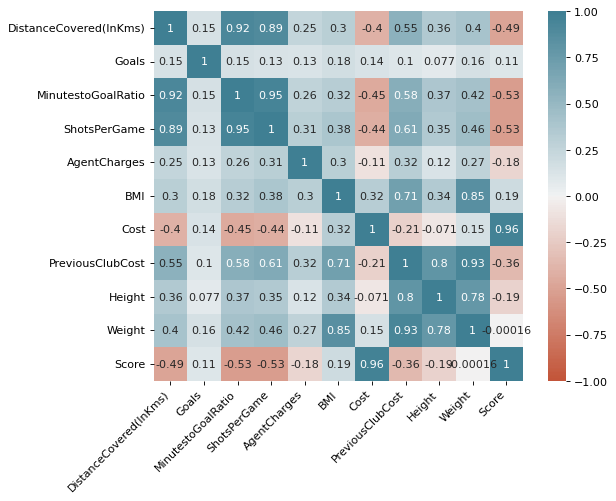

In [6]:
plt.figure(figsize = (8, 6), dpi = 80)
ax = sns.heatmap(
    corr,
    vmin = -1, vmax = 1, center = 0,
    cmap = sns.diverging_palette(20, 220, n = 200),
    square = True, annot = True,
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right'
)

In [22]:
X = df[['DistanceCovered(InKms)', 'Goals',
       'ShotsPerGame', 'AgentCharges', 'BMI', 'Cost',
       'PreviousClubCost']]
y = df['Score']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, 
                                                    test_size = 0.25, random_state=100)

In [24]:
x_train_with_intercept = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_with_intercept).fit()

In [25]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     476.6
Date:                Sun, 30 Jun 2024   Prob (F-statistic):           9.69e-96
Time:                        10:20:16   Log-Likelihood:                -252.91
No. Observations:                 151   AIC:                             521.8
Df Residuals:                     143   BIC:                             546.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      9.2052      1.601      5.750      0.000       6.041      12.370
DistanceCovered(InKms)    -0.6790      0.563     -1.206      0.230      -1.792       0.434
Goals                      0.0279      0.060      0.464      0.643      -0.091       0.147
ShotsPerGame              -0.1151      0.191     -0.601      0.548      -0.493       0.263
AgentCharges              -0.0023      0.002     -0.939      0.349      -0.007       0.003
BMI                        0.1841      0.077      2.386      0.018       0.032       0.337
Cost                       0.1612      0.005     31.297      0.000       0.151       0.171
PreviousClubCost          -0.0953      0.017     -5.772      0.000      -0.128      -0.063
==============================================================================
Omnibus:                        7.786   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                7.830
Skew:                           0.444   Prob(JB):                       0.0199
Kurtosis:                       3.675   Cond. No.                     1.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
X = df[['DistanceCovered(InKms)','BMI', 'Cost','PreviousClubCost']]
y = df['Score']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75,
                                                   random_state =100)

In [28]:
x_train_w_intercept = sm.add_constant(X_train)
lr=sm.OLS(y_train, x_train_w_intercept).fit()

In [29]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     843.0
Date:                Sun, 30 Jun 2024   Prob (F-statistic):          9.28e-100
Time:                        10:20:45   Log-Likelihood:                -253.64
No. Observations:                 151   AIC:                             517.3
Df Residuals:                     146   BIC:                             532.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      9.2171      1.548      5.955      0.000       6.158      12.276
DistanceCovered(InKms)    -0.9395      0.323     -2.905      0.004      -1.579      -0.300
BMI                        0.1629      0.074      2.200      0.029       0.017       0.309
Cost                       0.1628      0.005     33.617      0.000       0.153       0.172
PreviousClubCost          -0.0961      0.016     -5.861      0.000      -0.129      -0.064
==============================================================================
Omnibus:                        7.362   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                7.506
Skew:                           0.412   Prob(JB):                       0.0234
Kurtosis:                       3.717   Cond. No.                     1.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
clubs = set(df2.Club)
clubs

{'CHE', 'LIV', 'MUN'}

In [51]:
nominal_features = pd.get_dummies(df2['Club'], dtype = 'int')
nominal_features.head()

,CHE,LIV,MUN
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [52]:
df_encoded = pd.concat([df, nominal_features], axis = 1)
df_encoded.head()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score,CHE,LIV,MUN
0,3.96,7.5,37.5,12.3,60,20.56,109.1,63.32,195.9,78.9,19.75,0,0,1
1,4.41,8.3,38.2,12.7,68,20.67,102.8,58.55,189.7,74.4,21.30,0,0,1
2,4.14,5.0,36.4,11.6,21,21.86,104.6,55.36,177.8,69.1,19.88,0,0,1
3,4.11,5.3,37.3,12.6,69,21.88,126.4,57.18,185.0,74.9,23.66,0,0,1
4,4.45,6.8,41.5,14.0,29,18.96,80.3,53.20,184.6,64.6,17.64,0,0,1


In [53]:
X = df_encoded[['DistanceCovered(InKms)','BMI', 'Cost','PreviousClubCost', 'CHE', 'MUN','LIV']]
y = df_encoded['Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75,
                                                       random_state = 100)
x_train_w_intercept = sm.add_constant(X_train)
lr = sm.OLS(y_train, x_train_w_intercept).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     691.4
Date:                Sun, 30 Jun 2024   Prob (F-statistic):          1.79e-103
Time:                        11:59:27   Log-Likelihood:                -237.58
No. Observations:                 151   AIC:                             489.2
Df Residuals:                     144   BIC:                             510.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3.9020      1.180      3.306      0.001       1.569       6.235
DistanceCovered(InKms)    -0.3125      0.316     -0.989      0.324      -0.937       0.312
BMI                        0.2677      0.070      3.826      0.000       0.129       0.406
Cost                       0.1459      0.005     27.435      0.000       0.135       0.156
PreviousClubCost          -0.0984      0.015     -6.578      0.000      -0.128      -0.069
CHE                        0.9915      0.424      2.336      0.021       0.153       1.830
MUN                        2.5777      0.363      7.109      0.000       1.861       3.294
LIV                        0.3328      0.510      0.652      0.515      -0.676       1.341
==============================================================================
Omnibus:                        2.294   Durbin-Watson:                   2.128
Prob(Omnibus):                  0.318   Jarque-Bera (JB):                1.891
Skew:                           0.260   Prob(JB):                        0.389
Kurtosis:                       3.174   Cond. No.                     6.87e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.35e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

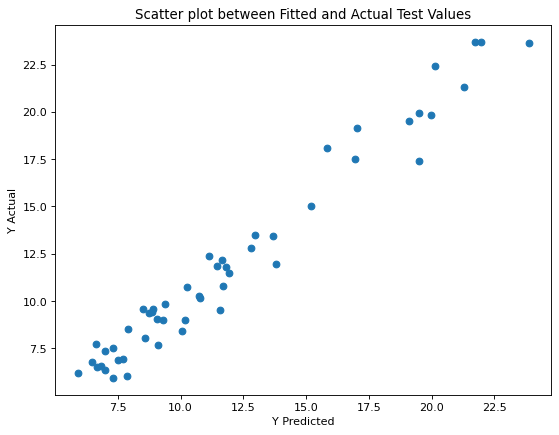

In [57]:
plt.figure(figsize=(8, 6), dpi=80)
x_test_with_intercept = sm.add_constant(X_test)
y_test_fitted = lr.predict(x_test_with_intercept)
plt.scatter(y_test_fitted, y_test)
plt.xlabel("Y Predicted")
plt.ylabel("Y Actual")
plt.title("Scatter plot between Fitted and Actual Test Values")
plt.show()